In [1]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt

In [2]:
import os
print(os.path.exists(r"C:\Users\hp\Downloads\Companies.csv"))

True


In [33]:
df = pandas.read_csv(r"C:\Users\hp\Downloads\Companies.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [7]:
df.shape

(1000, 5)

In [8]:
Y = df.Profit.values

In [9]:
Y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [29]:
X = df.iloc[:,:-1].values

In [30]:
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       ...,
       [100275.47, 241926.31, 227142.82],
       [128456.23, 321652.14, 281692.32],
       [161181.72, 270939.86, 295442.17]])

##### This data is pointless, there fore we graph is. We use a heatmap

In [34]:
df.drop(columns = ["State"], inplace = True)

<Axes: >

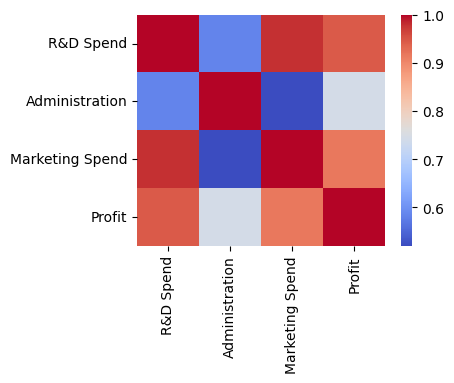

In [35]:
plt.figure(figsize = (4,3))
seaborn.heatmap(df.corr(), cmap = "coolwarm")

In [36]:
from sklearn.preprocessing import LabelEncoder

In [52]:
# Encoding categorical data
df = pandas.read_csv(r"C:\Users\hp\Downloads\Companies.csv")
le = LabelEncoder()
df["State"] = le.fit_transform(df["State"])

In [53]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 35)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [58]:
y_pred = model.predict(X_test)
y_pred

array([124980.69018589, 180418.65335676,  56415.2463431 , 158652.72140226,
       168940.08067152, 163777.00723812,  79297.40203331, 105564.43075052,
       176770.02387422, 139549.34940632, 178555.1199865 , 179648.93305792,
       113490.05029275, 144867.57370695, 108680.37581396, 182489.05445592,
       130341.15002007, 169671.01328541, 181540.04878665, 100089.33175911,
       116216.39449567, 135480.08895027, 122690.49218779, 142390.33276647,
        53831.9857001 , 125878.84086156, 173738.5498979 , 123620.53495196,
       126857.1528136 , 171998.27513156, 139404.54201084, 109933.64938188,
        97761.20803154,  79167.24773217, 163142.61283851,  94429.77571178,
       182864.86409016, 141826.6182277 ,  63601.31373533,  66154.40622215,
       126387.39068339, 234816.38206126,  88820.21277662, 160230.94969824,
       169602.91939175,  73680.94340094, 147800.78555136, 106674.62084726,
       146571.64649331, 185809.28135513,  80086.94711867, 149566.91875187,
        79796.47044629, 1

In [64]:
print(model.coef_)

[0.60406291 0.87406821 0.06675271]


In [65]:
model.intercept_

np.float64(-52378.80608021481)

##### Evaluation of the model

In [69]:
from sklearn.metrics import r2_score, mean_squared_error

In [70]:
r2_score(Y_test, y_pred)


0.9028519645694488

In [73]:
mse = mean_squared_error
print(mse(Y_test, y_pred))

193119063.7508925


##### We plot a graph

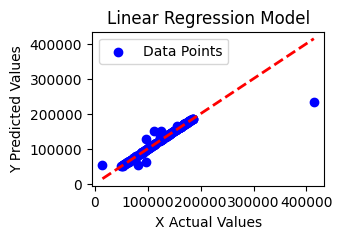

In [88]:
plt.figure(figsize = (3,2))
plt.scatter(Y_test, y_pred, color='blue', label="Data Points")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("X Actual Values")
plt.ylabel("Y Predicted Values")
plt.title("Linear Regression Model")
plt.legend()
plt.show()

In [80]:
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       ...,
       [100275.47, 241926.31, 227142.82],
       [128456.23, 321652.14, 281692.32],
       [161181.72, 270939.86, 295442.17]])

In [83]:
X.shape

(1000, 3)

In [84]:
Y.shape

(1000,)